In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [3]:
np.random.seed(49)
population = population = np.array([1]*600 + [0]*400)
np.random.shuffle(population)
print(np.sum(population))

600


In [4]:
sample = np.random.choice(population, size=100, replace=False)
sample

array([0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1])

In [5]:
len(sample)

100

In [6]:
answer_rate = sum(sample)/len(sample)
answer_rate

np.float64(0.56)

In [7]:
ci_up = answer_rate + 1.96 * np.sqrt(answer_rate*(1-answer_rate) / len(sample))

In [8]:
ci_lo = answer_rate - 1.96 * np.sqrt(answer_rate*(1-answer_rate) / len(sample))

In [9]:
print(f"95% доверительный интервал: от {ci_lo:.4f} до {ci_up:.4f}")

95% доверительный интервал: от 0.4627 до 0.6573


In [ ]:
Здесь мы выяснили, что доля положительных ответов населения попадает в доверительный интервал. 
Значит с 95%-ной уверенностью мы можем утверждать, что истинная доля населения будет находиться в этом интервале.

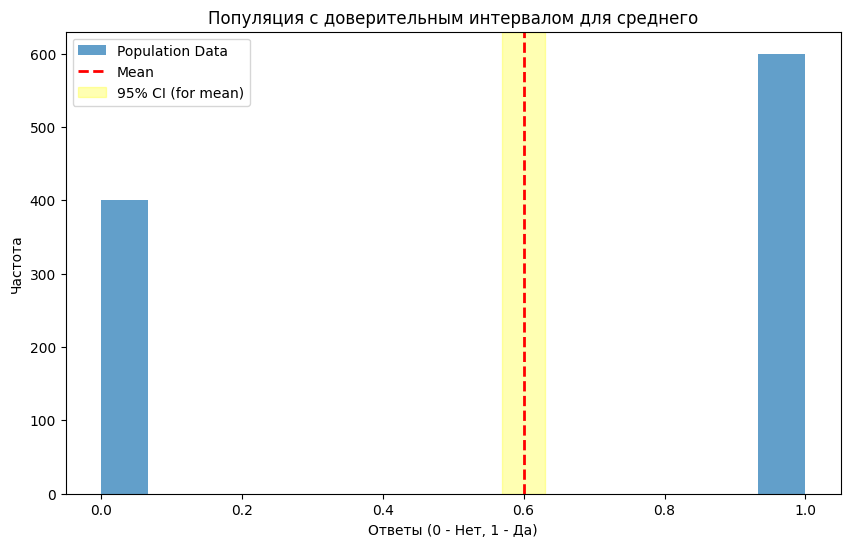

In [10]:
mean = np.mean(population)
sem = st.sem(population)

# Доверительный интервал для среднего
ci_large_1, ci_large_2 = st.norm.interval(confidence=0.95, loc=mean, scale=sem)

# Построение графика для популяции
plt.figure(figsize=(10, 6))
plt.hist(population, bins=15, alpha=0.7, label='Population Data')

# Рисуем среднее значение
plt.axvline(mean, color='red', linestyle='dashed', linewidth=2, label='Mean')

# Выделяем доверительный интервал для среднего
plt.axvspan(ci_large_1, ci_large_2, color='yellow', alpha=0.3, label='95% CI (for mean)')

plt.xlabel('Ответы (0 - Нет, 1 - Да)')
plt.ylabel('Частота')
plt.title('Популяция с доверительным интервалом для среднего')
plt.legend()
plt.show()

In [ ]:
Продемонстрируйте влияние размера выборки на форму распределения средних, используя равномерное распределение.

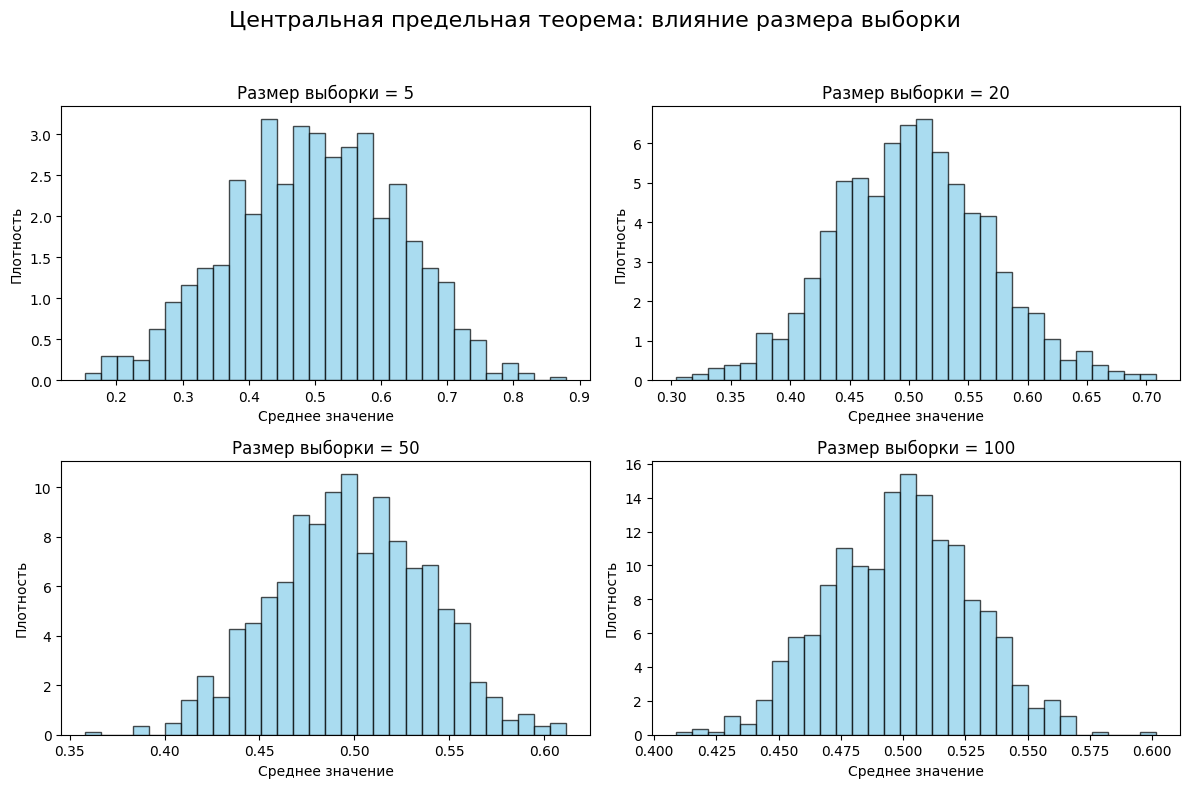

In [21]:
def simulate_sample_means(sample_size, num_samples=1000):
    means = []
    for _ in range(num_samples):
        sample = np.random.uniform(0, 1, size=sample_size)
        means.append(np.mean(sample))
    return means

sample_sizes = [5, 20, 50, 100]
plt.figure(figsize=(12, 8))

for i, size in enumerate(sample_sizes, 1):
    means = simulate_sample_means(size)
    plt.subplot(2, 2, i)
    plt.hist(means, bins=30, density=True, alpha=0.7, color='skyblue', edgecolor='black')
    plt.title(f"Размер выборки = {size}")
    plt.xlabel("Среднее значение")
    plt.ylabel("Плотность")

plt.suptitle("Влияние размера выборки", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
